In [80]:
import auto_ts
from auto_ts import auto_timeseries
import pandas as pd

In [81]:
# check auto_ts version
print(auto_ts.__version__)

0.0.68


In [82]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [83]:
df_all = pd.read_csv('train.csv')

In [84]:
df_all = df_all.pivot_table(index='cfips', columns='first_day_of_month', values='microbusiness_density')

In [85]:
df_all

first_day_of_month,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,...,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01
cfips,,,,,,,,,,,,,,,,,,,,,
1001,3.007682,2.884870,3.055843,2.993233,2.993233,2.969090,2.909326,2.933231,3.000167,3.004948,...,3.296781,3.334431,3.336785,3.372082,3.313253,3.346197,3.437971,3.423852,3.442677,3.463856
1003,7.239156,7.290936,7.425439,7.426071,7.470274,7.413655,7.282522,7.309610,7.568799,7.603275,...,7.733397,7.823300,7.945311,7.979170,7.907365,8.507496,8.573463,8.491150,8.341701,8.359798
1005,1.073138,0.995794,1.160149,1.000628,1.000628,1.027229,1.022314,1.032144,1.086209,1.081294,...,1.186629,1.206827,1.196728,1.191678,1.186629,1.191678,1.216926,1.196728,1.206827,1.232074
1007,1.310777,1.305176,1.254761,1.254761,1.265965,1.253638,1.248041,1.264831,1.270428,1.287217,...,1.214165,1.236650,1.264755,1.253513,1.247892,1.275998,1.326588,1.292861,1.315346,1.287240
1009,1.544148,1.575892,1.546415,1.573625,1.555485,1.573217,1.536999,1.541526,1.577744,1.575481,...,1.752923,1.777708,1.797986,1.764189,1.748417,1.773202,1.831783,1.836289,1.852060,1.831783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2.640386,2.858371,2.913635,3.008812,3.088637,3.150922,3.169494,3.237588,3.293302,3.311873,...,2.926768,2.892446,2.848763,2.851883,2.820681,2.783238,2.836282,2.811320,2.811320,2.823801
56039,26.433363,26.611856,26.736261,26.920164,26.903938,26.684565,26.738255,26.668457,27.119463,27.414764,...,25.532248,25.438322,25.636610,25.626175,25.506157,25.652266,25.939260,26.085369,26.090586,26.273220
56041,4.612016,4.338306,4.420419,4.372520,4.310935,4.367864,4.237172,4.182143,4.195900,4.443527,...,3.754478,3.954258,4.023147,4.064481,3.885368,3.906035,3.981813,3.974924,3.995591,4.009369


In [89]:
def train(cfip):
    df = df_all.loc[cfip].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    df = df.sort_values('ds')
    df = df.set_index('ds')
    df = df.dropna()
    # the data is monthly, so we set the time interval to 'M'
    # we willl forecast for next 3 months

    model = auto_timeseries(
        score_type='rmse',
        time_interval='M',
        model_type='best',
        verbose=1
        forecast_period=8,
    )
    model = model.fit(df, ts_column='ds', target='y', cv=3)
    return model

Start of Fit.....
    Target variable given as = y
Start of loading of data.....
    Inputs: ts_column = ds, sep = ,, target = ['y']
    Using given input: pandas dataframe...
    train time series ds column is the index on test data...
    train data shape = (39, 1)
Alert: Could not detect strf_time_format of ds. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


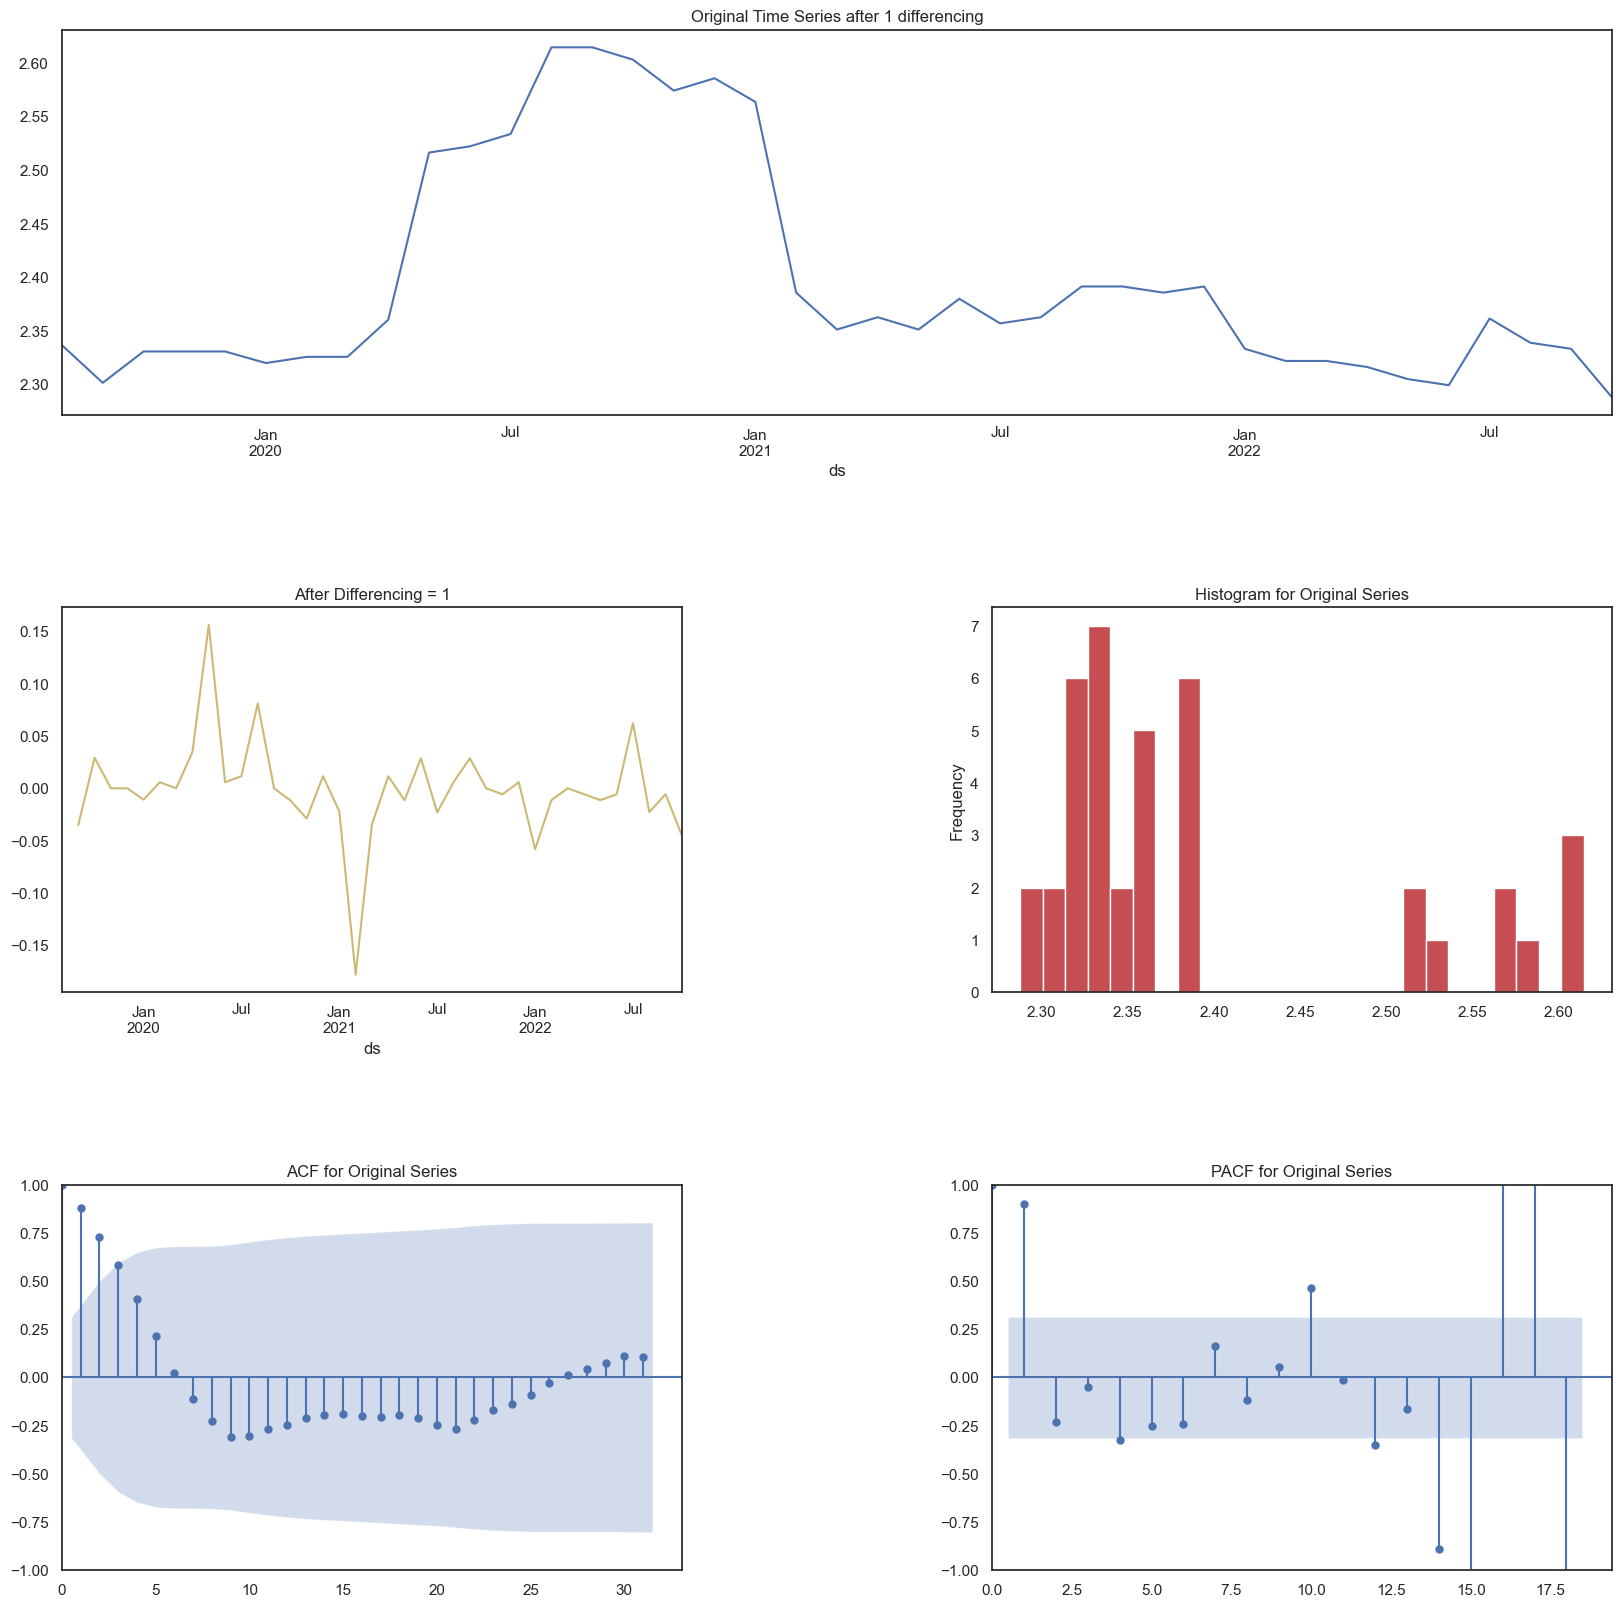

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100.0}
    Fit-Predict data (shape=(39, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 24 Test Shape: 5
Exception occurred while building Prophet model...
module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally depr

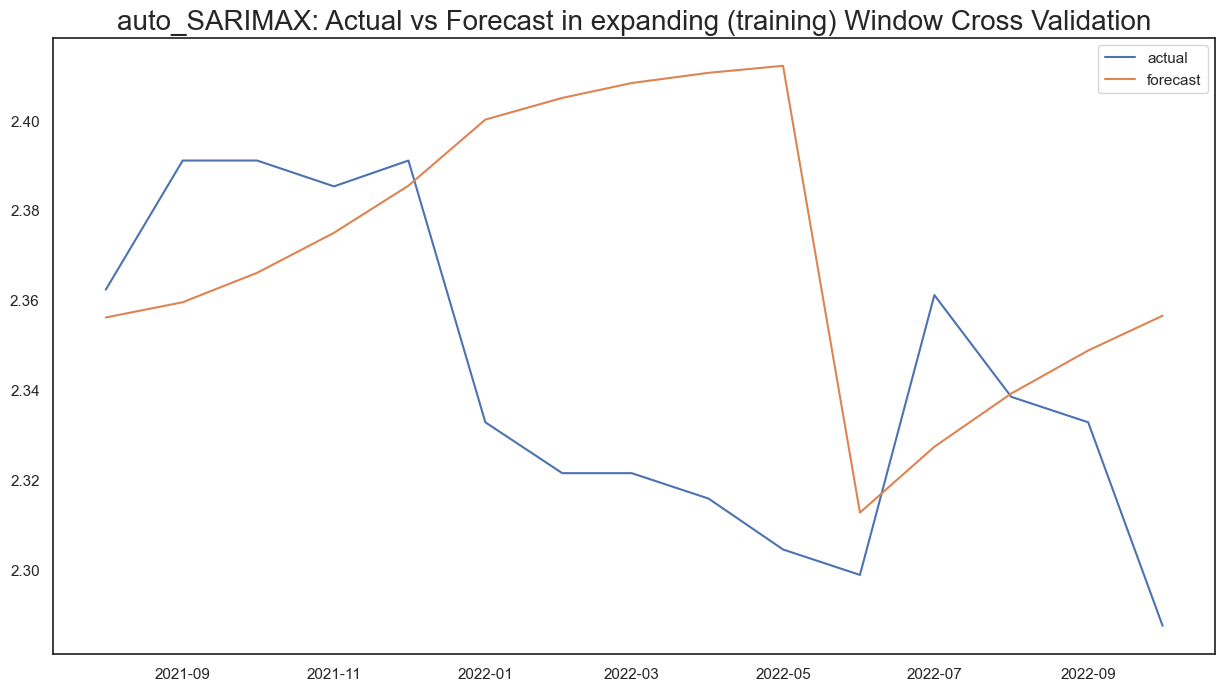

In [90]:
sample_cfip = df_all.index[100]
model = train(sample_cfip)
model
#  predict for next 3 months


In [101]:
predictions = model.predict(8, simple=True)
predictions

Predicting using forecast period=8 as input for auto_SARIMAX model


2022-11-01    2.270801
2022-12-01    2.265903
2023-01-01    2.260499
2023-02-01    2.254686
2023-03-01    2.248541
Freq: MS, Name: yhat, dtype: float64

In [93]:
# create a df for predictions test dates
# predict for certain date

def predict(model, cfip, date):
    df = df_all.loc[cfip].reset_index()
    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'])
    df = df.sort_values('ds')
    df = df.set_index('ds')
    df = df.dropna()
    df = df.loc[:date]
    # the data is monthly, so we set the time interval to 'M'
    # we willl forecast for next 8 months
    forecast = model.predict(
        n_periods=3,
        future_date=pd.to_datetime(date) + pd.DateOffset(months=3)
    )

    return forecast

forecast = predict(model, sample_cfip, '2020-12-01')

TypeError: predict() got an unexpected keyword argument 'n_periods'